<a href="https://colab.research.google.com/github/Shaleth13/FedEx_EDA/blob/main/Capstone_Project_fedex_analysis_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Fedex data analysis and EDA



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual

# **Project Summary -**

at the end

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Business Context:**
FedEx Logistics manages a complex global supply chain, dealing with shipments across various regions, countries, and industries. This dataset provides an in-depth look at their logistics processes, capturing important information on purchase orders (POs), shipment methods, vendor agreements (INCO terms), delivery schedules, and product-specific details such as item descriptions and dosage forms. Effective management of these processes ensures timely delivery, minimizes freight costs, and improves customer satisfaction.

Given the rise of eCommerce and global distribution, companies like FedEx must continuously optimize their logistics operations to maintain a competitive edge. The dataset is designed to provide insights into how shipments are managed, identify bottlenecks or delays, and ensure cost-effectiveness. By analyzing the data, FedEx Logistics aims to streamline supply chain operations, improving delivery timelines and reducing costs for both the company and its customers.

#### **Define Your Business Objective?**

Regulation of on-time deliveries

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
!pip install plotly

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
filepath="/content/SCMS_Delivery_History_Dataset (2).csv"
auto_df=pd.read_csv(filepath)


Mounted at /content/drive


### Dataset First View

In [4]:
# Dataset First Look
auto_df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,60,17465,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count (rows,columns)
auto_df.shape

(10324, 33)

### Dataset Information

In [6]:
# Dataset Info
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Columns

In [7]:
auto_df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicate_count=auto_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
null_count=auto_df.isnull().sum()
print("number of total null values= ",null_count)

number of total null values=  ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Pri

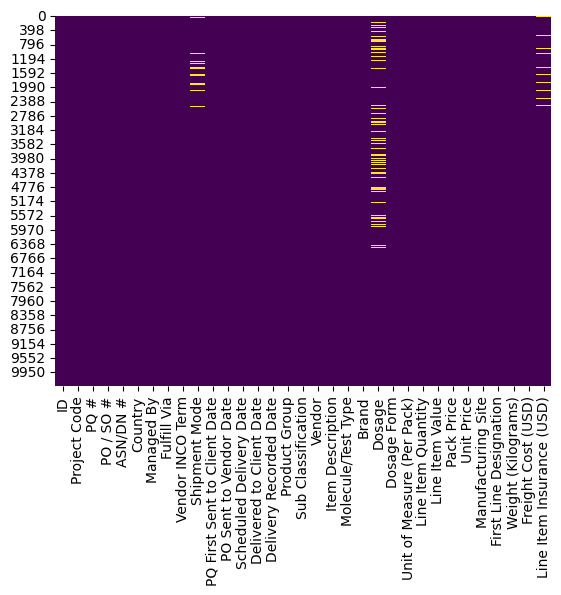

In [10]:
# Visualizing the missing values
sns.heatmap(auto_df.isnull(),cbar=False,cmap='viridis')
plt.show()

##### Insights from the heatmap:


*   Sns heatmap is used as the Seaborn heatmap provides a clean, customizable, and easy-to-interpret visualization for missing data.
*   Missing values in shipment mode could indicate that some orders were placed, but their shipments haven't been processed or recorded yet.
*   The missing values in dosage shows issues in how dosage data is captured like certain types of products may not require dosage details, or dosage may not apply to all records.

 A large number of missing values might suggest a need to either investigate why dosage data is missing for such a large number of records

*   Missing values in Line term insurance indicates that insurance may not be applicable in every case or a data entry issue where insurance details weren't captured for certain line items.






## ***2. Understanding Your Variables***

In [11]:
# Dataset Columns
auto_df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

In [12]:
# Dataset Describe
auto_df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


### Variables Description











ID – Unique identifier for entry

Project Code – Assigned project identification code

PQ # – Procurement request tracking number

PO / SO # – Purchase or sales order number

ASN/DN # – Advance shipment/delivery note number

Country – Destination or procurement country

Managed By – Responsible managing entity/person

Fulfill Via – Fulfillment method or channel

Vendor INCO Term – Agreed international shipping terms

Shipment Mode – Transportation method for shipment

PQ First Sent to Client Date – Initial procurement request submission date

PO Sent to Vendor Date – Order transmission to vendor date

Scheduled Delivery Date – Expected delivery completion date

Delivered to Client Date – Actual delivery to client date

Delivery Recorded Date – Delivery acknowledgment recording date

Product Group – Broad product classification category

Sub Classification – Detailed product category classification

Vendor – Supplier or manufacturer name

Item Description – Detailed product item description

Molecule/Test Type – Active ingredient or test classification

Brand – Product’s marketed brand name

Dosage – Strength or concentration measurement

Dosage Form – Physical form of medication

Unit of Measure (Per Pack) – Measurement unit per package

Line Item Quantity – Ordered quantity for line item

Line Item Value – Total cost of item

Pack Price – Price per product package

Unit Price – Cost per single unit

Manufacturing Site – Production facility location

First Line Designation – First-line treatment classification status

Weight (Kilograms) – Product’s total weight measurement

Freight Cost (USD) – Shipping transportation expense in USD

Line Item Insurance (USD) – Insurance cost per item


### Check Unique Values for each variable.

In [13]:
auto_df.nunique()

,0
ID,10324
Project Code,142
PQ #,1237
PO / SO #,6233
ASN/DN #,7030
Country,43
Managed By,4
Fulfill Via,2
Vendor INCO Term,8
Shipment Mode,4


## 3. ***Data Wrangling***

### Data Wrangling Code

In [14]:
# Write your code to make your dataset analysis ready.

#Handling Missing Values
auto_df.dropna(inplace=True)

#Handle missing values for 'Shipment_Mode' (categorical)
auto_df['Shipment Mode'].fillna(auto_df['Shipment Mode'].mode()[0], inplace=True)

#Handle missing values for 'Dosage' (numerical)
# 1. Extract only the first numeric value from the 'Dosage' column
auto_df['Dosage_cleaned'] = auto_df['Dosage'].str.extract(r'(\d+)').astype(float)
# 2. Now fill the missing values with the median of the cleaned column
auto_df['Dosage_cleaned'].fillna(auto_df['Dosage_cleaned'].median(), inplace=True)

#Handle missing values for 'Line_Term_Insurance' (categorical)
auto_df['Line Item Insurance (USD)'].fillna(auto_df['Line Item Insurance (USD)'].mode()[0], inplace=True)

# Remove duplicate rows if they exist
auto_df.drop_duplicates(inplace=True)

# Convert the 'Delivery Recorded Date' and 'Scheduled Delivery Date' columns to datetime
auto_df['Delivery Recorded Date'] = pd.to_datetime(auto_df['Delivery Recorded Date'])
auto_df['Scheduled Delivery Date'] = pd.to_datetime(auto_df['Scheduled Delivery Date'])

# Create a new column showing the difference in recorded and scheduled delivery dates
auto_df['delivery date accuracy'] = auto_df['Scheduled Delivery Date'] - auto_df['Delivery Recorded Date']

# Save the cleaned dataset to a new CSV file
auto_df.to_csv("cleaned_dataset.csv", index=False)


In [15]:
auto_df

#if accuracy is positive then its delivered early
#if accuracy is negative then its delivered late
#if accuracy is 0 then its delivered on time

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Dosage_cleaned,delivery date accuracy
21,108,104-CI-T01,Pre-PQ Process,SCMS-698,ASN-727,Côte d'Ivoire,PMO - US,Direct Drop,CIP,Air,...,140581.50,25.50,0.42,"BMS Meymac, France",Yes,2126,Freight Included in Commodity Cost,224.93,200.0,0 days
22,115,108-VN-T01,Pre-PQ Process,SCMS-753,ASN-781,Vietnam,PMO - US,Direct Drop,EXW,Air,...,1920.00,1.92,0.01,"Aurobindo Unit III, India",Yes,941,4193.49,3.07,10.0,0 days
23,116,108-VN-T01,Pre-PQ Process,SCMS-759,ASN-632,Vietnam,PMO - US,Direct Drop,FCA,Air,...,41095.00,82.19,0.68,ABBVIE Ludwigshafen Germany,Yes,117,1767.38,65.75,200.0,0 days
29,161,117-ET-T01,Pre-PQ Process,SCMS-11070,ASN-916,Ethiopia,PMO - US,Direct Drop,EXW,Air,...,99200.00,1.55,0.03,"Aurobindo Unit III, India",Yes,4228,12237.61,158.72,30.0,0 days
32,269,108-VN-T01,Pre-PQ Process,SCMS-14190,ASN-1192,Vietnam,PMO - US,Direct Drop,EXW,Air,...,17000.00,17.00,0.57,Gilead(Nycomed) Oranienburg DE,Yes,76,2282.57,27.20,300.0,0 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79,30.0,11 days
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,...,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71,150.0,-7 days
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,...,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04,600.0,-3 days
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,...,113871.80,6.52,0.11,Mylan (formerly Matrix) Nashik,Yes,1392,Freight Included in Commodity Cost,134.03,150.0,29 days


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
On-time Delivery with Different Management Companies

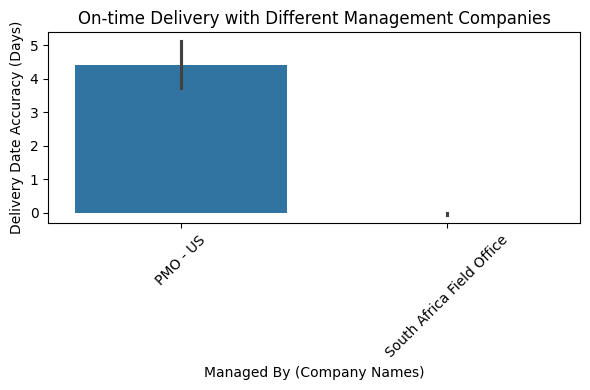

In [16]:
# Chart - 1 visualization code

# Ensure 'delivery date accuracy' is in days
auto_df['delivery date accuracy (days)'] = auto_df['delivery date accuracy'].dt.days

# Create a bar plot to visualize the on-time delivery variation by different companies
plt.figure(figsize=(6, 4))
sns.barplot(x='Managed By', y='delivery date accuracy (days)', data=auto_df)

plt.xlabel('Managed By (Company Names)')
plt.ylabel('Delivery Date Accuracy (Days)')
plt.title('On-time Delivery with Different Management Companies')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()


##### 1. Why did you pick the specific chart?

A box plot will show the distribution (median, quartiles, outliers) of delivery date accuracy for each company.

##### 2. What is/are the insight(s) found from the chart?

It tells that the management by US gives better accuracy than management by South Africa.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We need to improve the conditions of the South Africa management projects by taking inspirations from the US management.

#### Chart - 2
Shipment modes affecting the scheduled delivery date

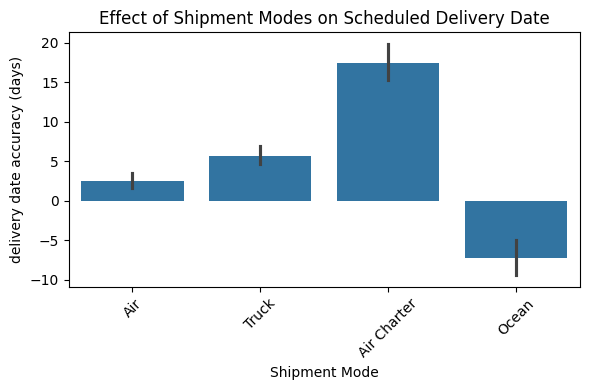

In [17]:
# Chart - 2 visualization code
auto_df['delivery date accuracy (days)'] = auto_df['delivery date accuracy'].dt.days

# Create a bar plot to show the impact of Shipment Mode on delivery accuracy
plt.figure(figsize=(6, 4))
sns.barplot(x='Shipment Mode', y='delivery date accuracy (days)', data=auto_df)

plt.xlabel('Shipment Mode')
plt.ylabel('delivery date accuracy (days)')
plt.title('Effect of Shipment Modes on Scheduled Delivery Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()  # Ensure labels don't overlap
plt.show()

##### 1. Why did you pick the specific chart?

The box plots help to identify the amount of accuracy in each modes of transport with the positive trends showing early delivery and the negative trends showing late delivery.

##### 2. What is/are the insight(s) found from the chart?

Air charter shipments are early and consistent, making them the most reliable for early deliveries.
Air and Truck shipments face moderate accuracies.
Ocean shipments are the least reliable, showing significant and inconsistent delays.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


* Increase lead times, slowing down inventory restocking.
* Diminish customer satisfaction, especially for time-sensitive goods.
* Cause penalties for late shipments or loss of trust with key clients.
* Delay manufacturing processes for industries dependent on imported raw materials.

so we need to:
* Diversify Shipment Modes:
Shift some shipments to air or truck for time-sensitive deliveries, despite higher costs.
* Improve Port Operations:
Collaborate with shipping partners to prioritize faster clearance and efficient handling.
* Invest in Predictive Analytics:
Use AI/ML to forecast potential delays and proactively adjust shipment schedules.
* Establish Buffer Stock:
Maintain safety stock in warehouses to reduce dependency on tight shipment timelines.



#### Chart - 3


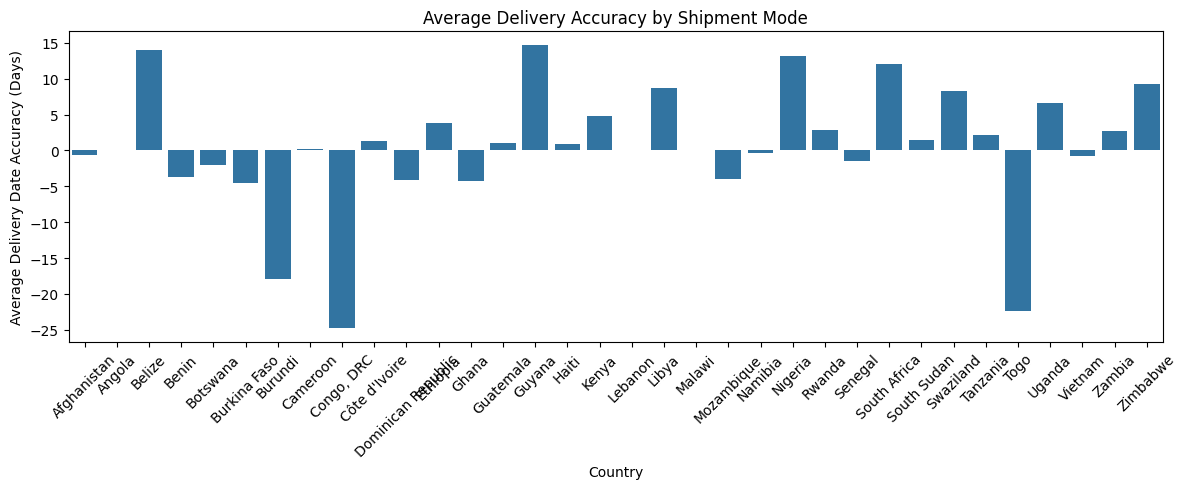

In [18]:
# Chart - 3 visualization code
# Group by 'Shipment Mode' and calculate the mean delivery accuracy
mean_accuracy_by_mode = auto_df.groupby('Country')['delivery date accuracy (days)'].mean().reset_index()

# Plot a bar plot of mean delivery accuracy for each Shipment Mode
plt.figure(figsize=(12, 5))
sns.barplot(x='Country', y='delivery date accuracy (days)', data=mean_accuracy_by_mode)

plt.xlabel('Country')
plt.ylabel('Average Delivery Date Accuracy (Days)')
plt.title('Average Delivery Accuracy by Shipment Mode')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This will display the average delivery accuracy for each country to identify which modes are generally on time or delayed.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that average delivery date accuracy (in days) varies significantly across different countries.

On the other hand, countries like Belize and Namibia have positive delivery accuracy, suggesting early deliveries.


Countries like Tanzania and Burkina Faso seem to have the most negative delivery accuracy, indicating severe delays due to due to Inefficiencies in logistics (port operations, customs clearance delays, etc.),
Infrastructure issues, especially in landlocked or underdeveloped regions,
Higher reliance on delayed shipment modes, such as ocean freight.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

For countries with negative accuracy should:
Invest in logistics infrastructure (e.g., ports, roads, customs efficiency).
Optimize shipping mode choices based on urgency and geography.
Implement predictive analytics to identify and mitigate delays in advance.

#### Chart - 4

#####Average Delivery Accuracy by Weights

In [19]:
# Replace non-numeric values in "Weight (Kilograms)" with NaN, calculate mean, and fill NaN with mean
auto_df["Weight (Kilograms)"] = pd.to_numeric(auto_df["Weight (Kilograms)"], errors='coerce')
auto_df["Weight (Kilograms)"].fillna(auto_df["Weight (Kilograms)"].mean(), inplace=True)

# Replace non-numeric values in "Pack Price" with NaN, calculate mean, and fill NaN with mean
auto_df["Pack Price"] = pd.to_numeric(auto_df["Pack Price"], errors='coerce')
auto_df["Pack Price"].fillna(auto_df["Pack Price"].mean(), inplace=True)

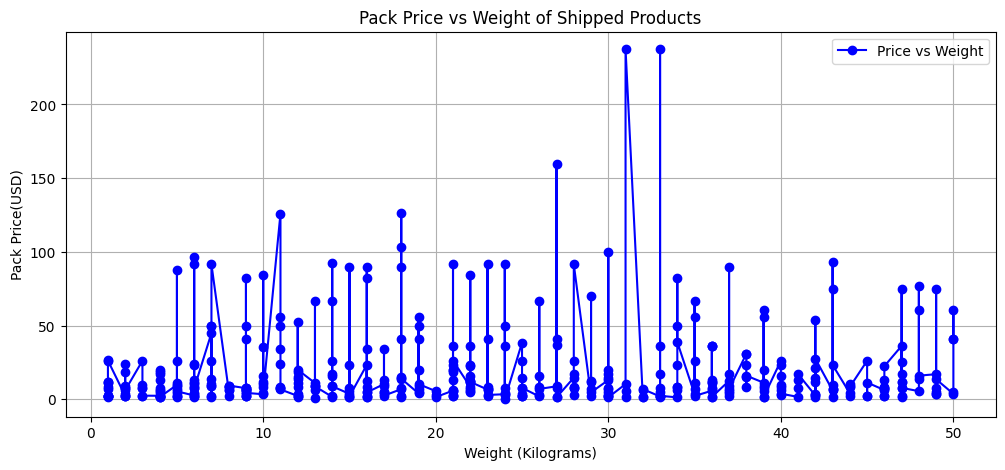

In [20]:
# Chart - 4 visualization code
#Replace with your actual dataset
data = pd.read_csv("cleaned_dataset.csv")  # Adjust the filename as needed

# Convert columns to numeric, coercing errors to NaN
data["Weight (Kilograms)"] = pd.to_numeric(data["Weight (Kilograms)"], errors='coerce')
data["Pack Price"] = pd.to_numeric(data["Pack Price"], errors='coerce')

# Filter the dataset to focus on a reasonable range of weights and prices
filtered_data = data[(data["Weight (Kilograms)"] <= 50) & (data["Pack Price"] <= 1000)]

# Sort data by weight for a smoother line plot
filtered_data = filtered_data.sort_values(by="Weight (Kilograms)")

# Line plot
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.plot(filtered_data["Weight (Kilograms)"], filtered_data["Pack Price"], marker='o', color='blue', label='Price vs Weight')
plt.xlabel("Weight (Kilograms)")
plt.ylabel("Pack Price(USD)")
plt.title("Pack Price vs Weight of Shipped Products")
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Since both variables are continuous, a line plot helps visualize trends, fluctuations, and possible outliers clearly.

##### 2. What is/are the insight(s) found from the chart?

Most shipments are in the low-weight range (0–20 kg), with prices below 200 USD, while fewer shipments exist in higher weight categories. This shows that the business primarily deals in lighter shipments.

Outliers:
Unusually high prices for specific weights (e.g., 30–35 kg) may represent niche products or errors in the pricing system.






##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Optimize Pricing Model:
Analyze pricing data to reduce inconsistencies and ensure the model accounts for weight, distance, and other relevant factors in a balanced way.
* Target Higher Weight Shipments:
Develop marketing strategies to attract businesses or customers shipping heavier goods.
* Monitor Outliers:
Regularly review outlier data points to determine if they are errors, anomalies, or opportunities for targeted premium services.
* Customer Feedback:
Collect customer feedback on shipping prices and address any concerns about fairness or clarity



#### Chart - 5
##### Difference in delivery performance based on the difference in time between the PO sent to the vendor and the scheduled delivery date


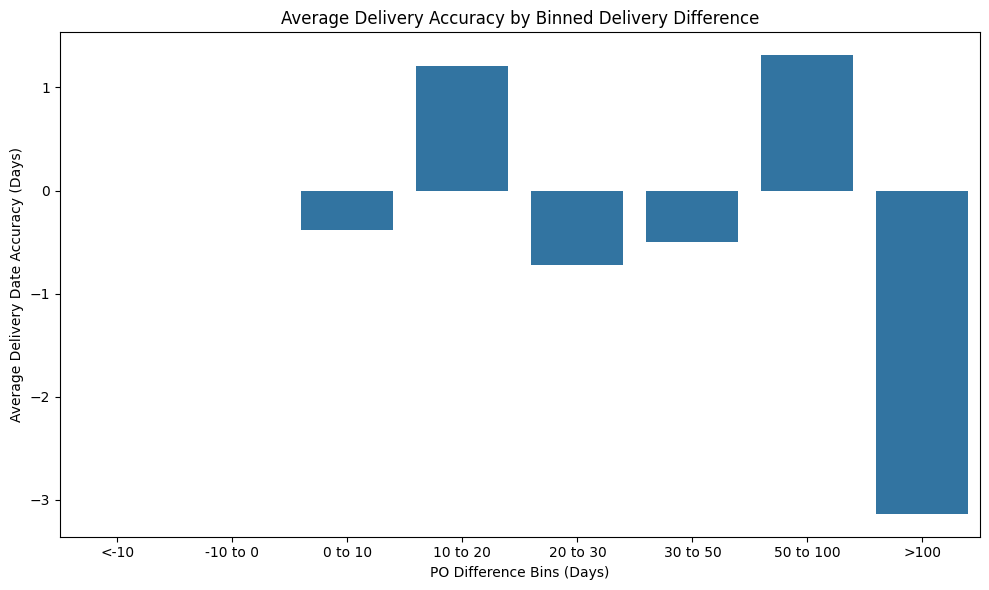

In [21]:
# Ensure both columns are in datetime format
auto_df['PO Sent to Vendor Date'] = pd.to_datetime(auto_df['PO Sent to Vendor Date'], errors='coerce')
auto_df['Scheduled Delivery Date'] = pd.to_datetime(auto_df['Scheduled Delivery Date'], errors='coerce')

# Calculate the difference between 'PO Sent to Vendor Date' and 'Scheduled Delivery Date'
auto_df['diff_PO_scheduled'] = (auto_df['PO Sent to Vendor Date']-auto_df['Scheduled Delivery Date']).dt.days.abs()

# Bin the 'diff_PO_scheduled' into categories (e.g., -10 to 0, 0 to 10, etc.)
bins = [-50, -10, 0, 10, 20, 30, 50, 100, 200]
labels = ['<-10', '-10 to 0', '0 to 10', '10 to 20', '20 to 30', '30 to 50', '50 to 100', '>100']
auto_df['PO_diff_binned'] = pd.cut(auto_df['diff_PO_scheduled'], bins=bins, labels=labels)

# Group by the binned categories and calculate the mean delivery accuracy
mean_accuracy_by_mode = auto_df.groupby('PO_diff_binned')['delivery date accuracy (days)'].mean().reset_index()

# Plot the result
plt.figure(figsize=(10, 6))
sns.barplot(x='PO_diff_binned', y='delivery date accuracy (days)', data=mean_accuracy_by_mode)

plt.xlabel('PO Difference Bins (Days)')
plt.ylabel('Average Delivery Date Accuracy (Days)')
plt.title('Average Delivery Accuracy by Binned Delivery Difference')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The bar plot will help to see the variation by taking each set of delivery bins as a particular category.

##### 2. What is/are the insight(s) found from the chart?

Bin <-10: A negative value indicates significantly delayed deliveries for these cases, suggesting poor accuracy when POs are far behind the scheduled delivery date.

Bin 10 to 20 and 50 to 100: These bins have positive values, showing over-performance or early deliveries within these ranges, which may exceed customer expectations.

Bin >100: Shows significant delays, which negatively impact business operations and customer satisfaction.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Focus on Outliers:

Analyze deliveries in <-10 and >100 bins to identify and mitigate the root causes of delays (e.g., vendor inefficiencies, supply chain bottlenecks).
Standardize Operations:

Aim to keep deviations closer to zero by refining PO schedules and delivery timelines based on historical data.
Customer Communication:

Proactively communicate with customers in case of delays to manage expectations and reduce dissatisfaction.

#### Chart - 6
##### Impact of the type of INCO term used on the vendor delivery performance

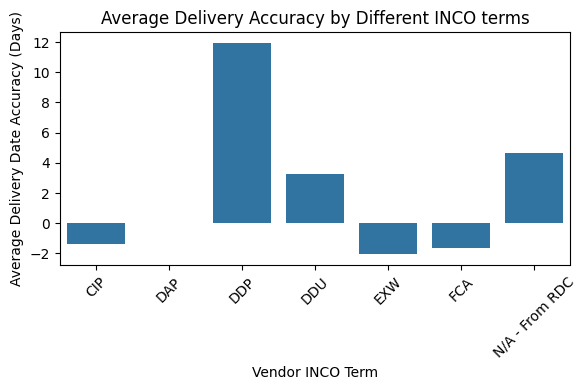

In [22]:
# Chart - 6 visualization code
# Group by Different INCO terms and calculate the mean delivery accuracy
mean_accuracy_by_mode = auto_df.groupby('Vendor INCO Term')['delivery date accuracy (days)'].mean().reset_index()

# Plot a bar plot of mean delivery accuracy for each Shipment Mode
plt.figure(figsize=(6,4))
sns.barplot(x='Vendor INCO Term', y='delivery date accuracy (days)', data=mean_accuracy_by_mode)

plt.xlabel('Vendor INCO Term')
plt.ylabel('Average Delivery Date Accuracy (Days)')
plt.title('Average Delivery Accuracy by Different INCO terms')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

It helps to predict the average accuracy in delivery for different categories of INCO tefms used during shipment.

##### 2. What is/are the insight(s) found from the chart?

For INCO terms like DDP, DDU, N/A- From RDC we get a positive average accuracy which shows that the shipment has arrived earlier than expected.

For INCO terms like CIP, EXW, FCA, its showing negative average due to late in delivering the shipments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

**Improved Vendor and Logistics Management:**
Collaborate closely with carriers and logistics providers to reduce inefficiencies and ensure timely pickups and deliveries.

**Streamlined Processes for INCO Terms:**
For CIP and FCA, implement robust monitoring and tracking systems to better manage shipments and mitigate delays.

**Customer Communication:** Inform customers proactively about potential delays and provide realistic delivery timelines to manage their expectations.

**Review INCO Terms Usage:**
Where delays are frequent, consider using INCO terms like DDP (Delivered Duty Paid) that transfer more responsibility for timely delivery to the seller.

**Optimize Transit Time:** Analyze transit routes, customs clearance processes, and any bottlenecks to reduce overall lead times.

#### Chart - 7

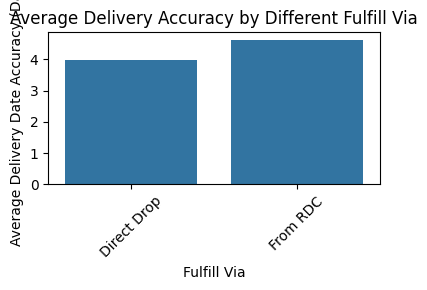

In [24]:
# Chart - 8 visualization code
# Group by Different Fulfill Via and calculate the mean delivery accuracy
mean_accuracy_by_mode = auto_df.groupby('Fulfill Via')['delivery date accuracy (days)'].mean().reset_index()

# Plot a bar plot of mean delivery accuracy for each Shipment Mode
plt.figure(figsize=(4,3))
sns.barplot(x='Fulfill Via', y='delivery date accuracy (days)', data=mean_accuracy_by_mode)

plt.xlabel('Fulfill Via')
plt.ylabel('Average Delivery Date Accuracy (Days)')
plt.title('Average Delivery Accuracy by Different Fulfill Via')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart compares the average delivery date accuracy based on two different fulfillment methods — Direct Drop and From RDC (Regional Distribution Center). It's important for identifying which shipping method is more reliable in meeting delivery timelines.

##### 2. What is/are the insight(s) found from the chart?

Direct Drop shipments have better delivery accuracy (lower average delay in days) compared to From RDC.

RDC shipments take slightly longer to arrive on average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight helps FedEx:

1. Promote Direct Drop for urgent deliveries.

2. Review and improve RDC processes (like internal handling, dispatch delays).

3. Use this data to plan customer-specific shipping strategies based on need.


If RDC delays are not fixed, it could lead to customer dissatisfaction and loss of trust.

#### Chart - 8

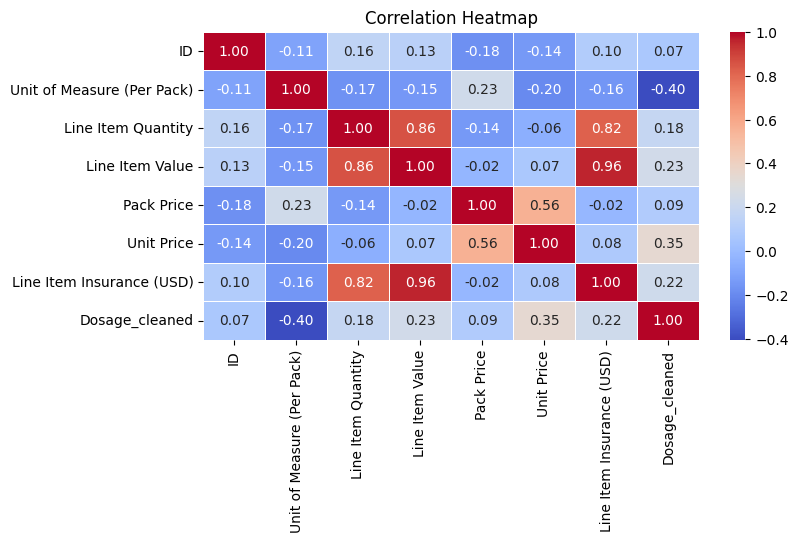

In [25]:
# Correlation Heatmap visualization code
data = pd.read_csv('cleaned_dataset.csv')
# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

# Set the size of the plot
plt.figure(figsize=(8, 4))

# Generate the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

I selected a correlation heatmap because it visually represents the relationships between different numerical variables in the dataset. It helps in identifying strong positive or negative correlations, making it easier to detect patterns and dependencies between key features such as Line Item Quantity, Line Item Value, Pack Price, and Insurance Cost. The color coding simplifies interpretation, with red indicating positive correlations and blue indicating negative correlations.

##### 2. What is/are the insight(s) found from the chart?



1. **Line Item Quantity and Line Item Value** show a strong positive correlation (0.86), suggesting that as the quantity increases, the total value also increases.
2. **Line Item Value and Line Item Insurance** (0.96) have a very strong correlation, indicating that insurance costs are highly dependent on the total value of the items.
3. **Pack Price and Unit Price** (0.56) have a moderate positive correlation, showing that higher pack prices tend to align with higher unit prices.
4. **Unit of Measure** (Per Pack) and Dosage_cleaned (-0.40) show a negative correlation, meaning that changes in dosage may inversely affect the unit of measure.
5. **The ID column** has little to no correlation with most variables, which is expected since it is just an identifier.

#### Chart - 9 - Pair Plot

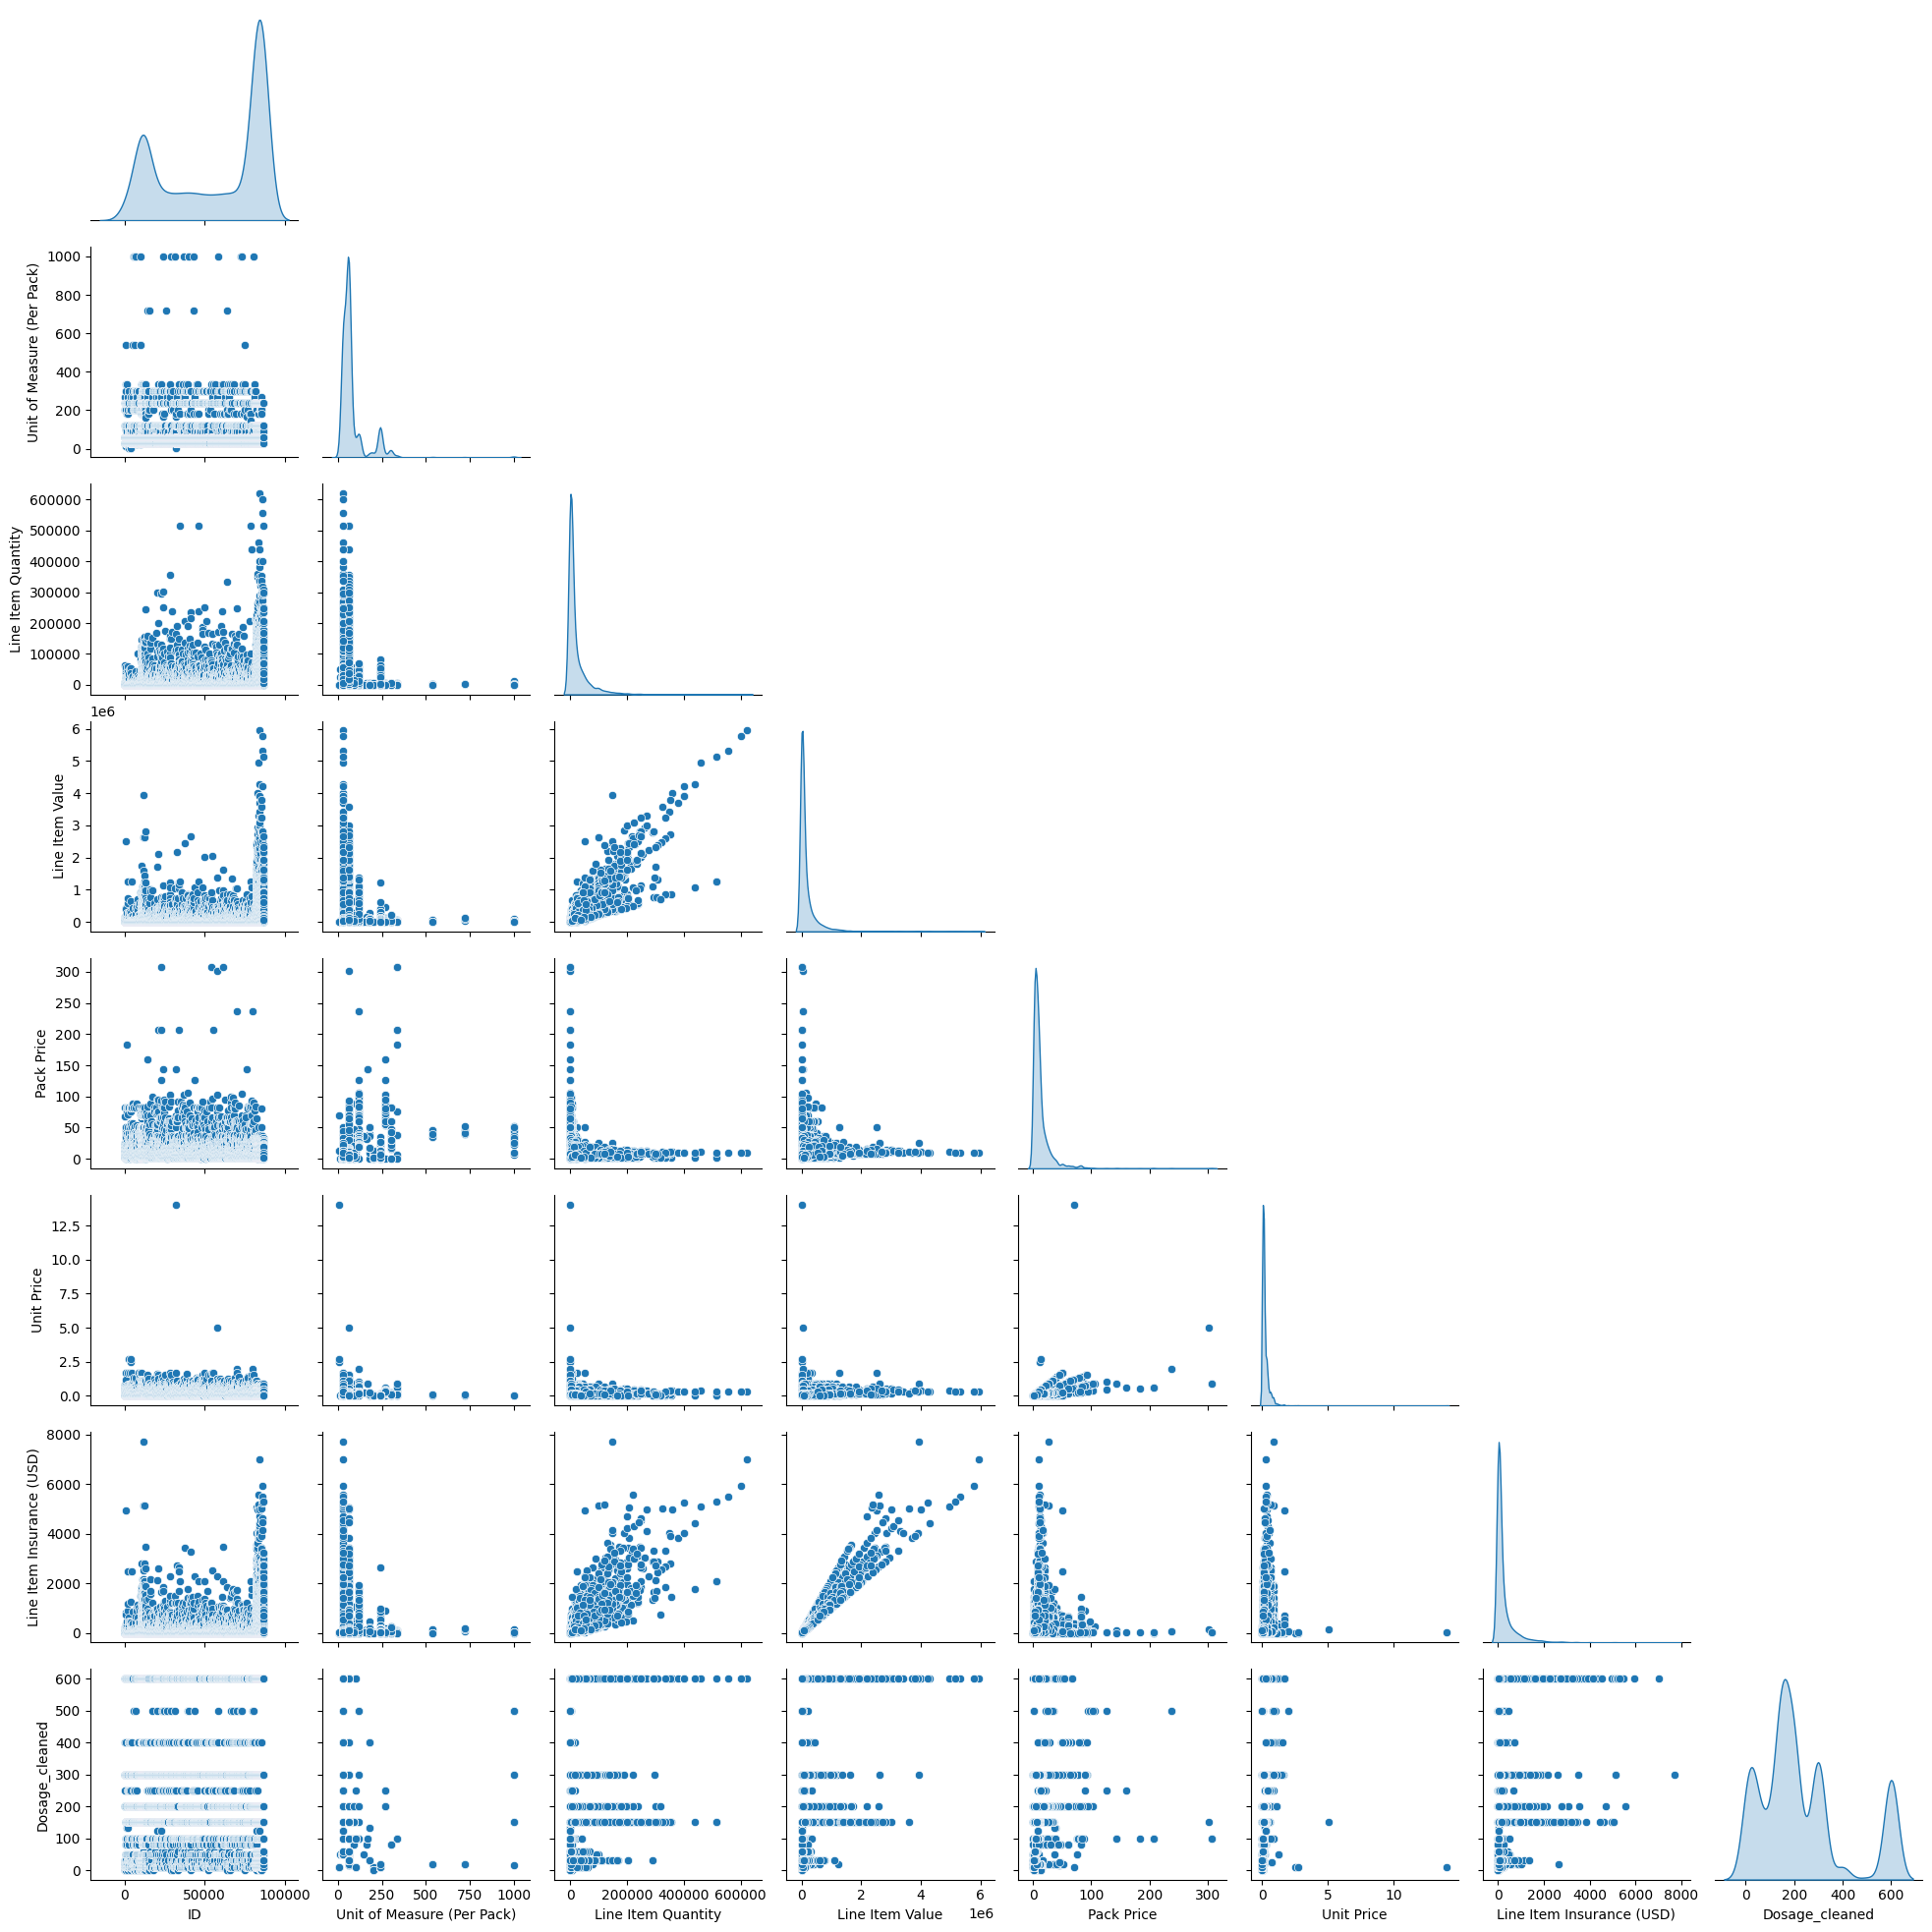

In [26]:
# Pair Plot visualization code
# Load the dataset
data = pd.read_csv('cleaned_dataset.csv')

# Select only the numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Generate the pair plot
sns.pairplot(numeric_data, diag_kind='kde', corner=True)

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

I selected a pair plot because it provides a comprehensive view of relationships between multiple numerical variables in the dataset. Unlike a correlation heatmap, which shows only correlation coefficients, a pair plot allows for visual pattern recognition through scatter plots and histograms. It helps identify trends, clusters, and possible outliers in the data while also showing variable distributions.

##### 2. What is/are the insight(s) found from the chart?

1. Line Item Quantity vs. Line Item Value likely shows a strong positive linear relationship, meaning that as the quantity increases, the total value also increases.
2. Line Item Value vs. Insurance Cost may reveal a similar pattern, confirming that insurance costs depend heavily on the item's value.
3. Pack Price vs. Unit Price could display a moderate positive correlation, suggesting that higher pack prices usually correspond to higher unit prices.
4. The diagonal KDE (Kernel Density Estimation) plots provide insights into the distribution of each variable, helping to detect skewness or multimodal distributions.
5. Potential outliers in some scatter plots might indicate unusual pricing, quantities, or costs that require further investigation.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

1. **Improve Pricing Transparency:**

    **Insight:** Pack price and unit price show strong linear relationships, but not always consistent.

    **Solution:** Standardize pricing rules based on quantity slabs. Customers will get clear pricing, and it helps FedEx avoid manual adjustments or billing issues.

2. **Predictive Planning for Demand Peaks:**

    **Insight:** Quantity and value patterns can be used for forecasting.

    **Solution:** Use historical shipment trends to forecast high-demand periods or regions. FedEx can then prepare more resources (trucks, staff) in advance to ensure faster deliveries.

3. **Segment Customers for Custom Solutions:**

   **Insight:** Some customers (or order types) may consistently ship large volumes.

   **Solution:** Create customer segments (e.g., high-volume business clients) and offer them tailored plans — like volume discounts or guaranteed express delivery — to improve loyalty and optimize fleet usage.



# **Conclusion**

By using shipping data to find patterns in pricing, demand, and customer behavior, FedEx can set clearer rates, plan ahead for busy periods, and offer better service to high-volume clients. These steps will help reduce costs and speed up deliveries.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***